# Sentiment Analysis

In [1]:
# pip install textblob

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

%matplotlib inline 

In [3]:
df = pd.read_csv('../datasets/df_clean.csv')

In [4]:
df.head()

,body,rating,product
0,great wireless music product as expecred,5.0,Apple Airpods-Latest Model
1,battery life dies really quick i really like m...,4.0,Apple Airpods-Latest Model
2,the audio sound muffled right ear i bought air...,3.0,Apple Airpods-Latest Model
3,comprarlo sin problemas perfect,5.0,Apple Airpods-Latest Model
4,good so,5.0,Apple Airpods-Latest Model


In [5]:
df.dtypes

body        object
rating     float64
product     object
dtype: object

In [6]:
df['body']= df.body.astype(str)

In [7]:
# From a dash of data 
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['body'].apply(pol)
df['subjectivity'] = df['body'].apply(sub)
df

,body,rating,product,polarity,subjectivity
0,great wireless music product as expecred,5.0,Apple Airpods-Latest Model,0.800000,0.750000
1,battery life dies really quick i really like m...,4.0,Apple Airpods-Latest Model,0.136667,0.303333
2,the audio sound muffled right ear i bought air...,3.0,Apple Airpods-Latest Model,0.194286,0.494286
3,comprarlo sin problemas perfect,5.0,Apple Airpods-Latest Model,1.000000,1.000000
4,good so,5.0,Apple Airpods-Latest Model,0.700000,0.600000
...,...,...,...,...,...
31863,good good,4.0,JBL T110BT,0.700000,0.600000
31864,amazing product an amazing product but a bit c...,5.0,JBL T110BT,0.600000,0.900000
31865,not bad sound,1.0,JBL T110BT,0.375000,0.533333
31866,a good product the sound is good battery life ...,5.0,JBL T110BT,0.560000,0.563333


KeyboardInterrupt: 

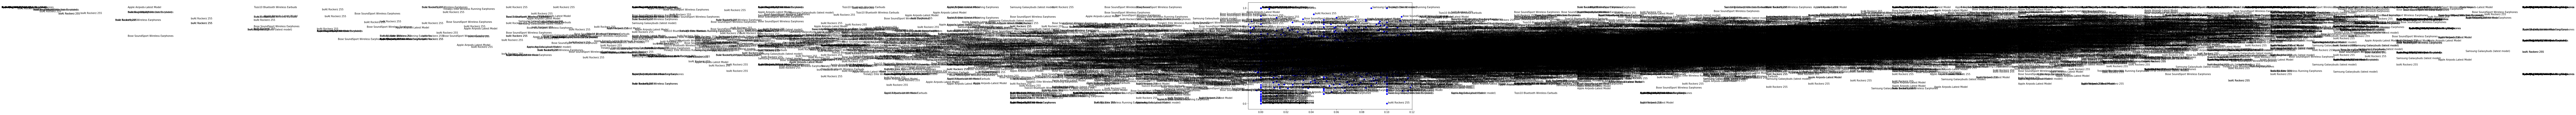

In [8]:
# Visualizing the overall sentiment analysis
plt.figure(figsize=(12,8))

for index, product in enumerate(df.index):
    x = df.polarity.loc[product].mean()
    y = df.subjectivity.loc[product].mean()
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, df['product'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()